In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
col=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','Class']
url='https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
dataset=pd.read_csv(url,names=col)

In [146]:
#Checking missing values
dataset.replace('?',np.NaN,inplace=True)
print(dataset.isnull().sum())
dataset.describe

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64


<bound method NDFrame.describe of     A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15  \
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  00202    0   
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g  00043  560   
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  00280  824   
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  00100    3   
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  00120    0   
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...   
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  00260    0   
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  00200  394   
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  00200    1   
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  00280  750   
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g  00000    0   

    Class  
0       +  
1       +  
2    

In [148]:
#Handling missing value
from sklearn.impute import SimpleImputer
cat_imp=SimpleImputer(strategy='most_frequent')
dataset=cat_imp.fit_transform(dataset)
dataset=pd.DataFrame(dataset)
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
x.shape

(690, 14)

In [150]:
#Checking if any null value left
dataset.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool

C:\Users\Asus\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


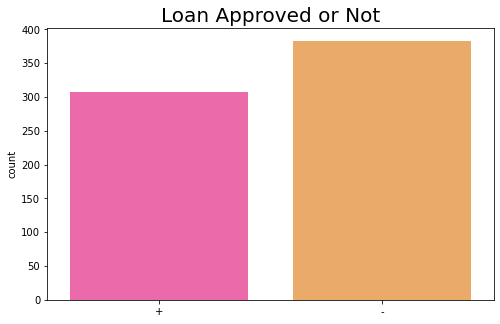

C:\Users\Asus\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


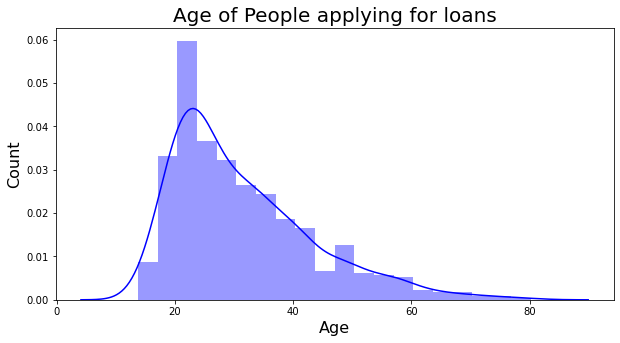

C:\Users\Asus\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


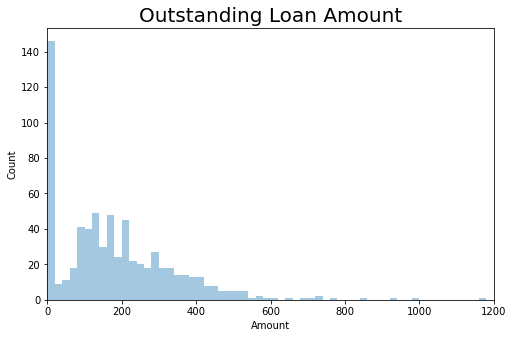

In [151]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.countplot(y, palette = 'spring')
plt.title('Loan Approved or Not', fontsize = 20)
plt.show()

plt.figure(figsize = (10, 5))
sns.distplot(x[:,0], color = 'blue')
plt.title('Age of People applying for loans', fontsize = 20)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

plt.figure(figsize=(8,5))
plt.xlim(0,1200)
plt.title('Outstanding Loan Amount', fontsize = 20)
plt.xlabel('Amount')
plt.ylabel('Count')
sns.distplot(x[:,12],bins=100,kde=False)
plt.show()

In [152]:
#Encoding our categorical data using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=[2,3,4,5,7,8,10,11]
for i in range(len(col)):
  x[:,col[i]]=le.fit_transform(x[:,col[i]])
y=le.fit_transform(y)

In [153]:
#Train Test Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state=1)
sc=MinMaxScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)
y_test.shape

(194,)

In [173]:
#SVM Classifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

model1 = svm.SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0]
gamma = ['scale']
# define grid search(HyperParameter Tuning)
grid1 = dict(kernel=kernel,C=C,gamma=gamma)
grid_search1 = GridSearchCV(estimator=model1, param_grid=grid1, n_jobs=-1,cv=10, scoring='accuracy',error_score=0)
grid_result1 = grid_search1.fit(x_train_sc, y_train)
# summarize results
print("Best Train Accuracy: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Best Train Accuracy: 0.846735 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [174]:
#Training Model using Best Parameters
clf=svm.SVC(C=1,kernel='rbf',gamma='scale')
clf=clf.fit(x_train_sc,y_train)
out=clf.predict(x_test_sc)
print("Train Accuracy:",accuracy_score(clf.predict(x_train_sc),y_train))
print("Test Accuracy:",accuracy_score(out,y_test))

Train Accuracy: 0.8608870967741935
Test Accuracy: 0.8762886597938144


In [175]:
#SVC Evaluation using Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
a=confusion_matrix(y_test,out)
print("Confusion Matrix: \n",a)
print(classification_report(y_test,out))
print('Accuracy score:%.2f'%(a.trace()/a.sum()))
misa=a.sum()-a.trace()
print("Misclassified Samples:",misa)

Confusion Matrix: 
 [[76  5]
 [19 94]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        81
           1       0.95      0.83      0.89       113

    accuracy                           0.88       194
   macro avg       0.87      0.89      0.88       194
weighted avg       0.89      0.88      0.88       194

Accuracy score:0.88
Misclassified Samples: 24


In [176]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search(HyperParameter Tuning)
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_sc, y_train)
# summarize results
print("Best Score(Train Data): %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score(Train Data): 0.852776 using {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'uniform'}


In [177]:
# Training the model on best parameters
clf=KNeighborsClassifier(n_neighbors=17)
clf.fit(x_train_sc,y_train)
out1=clf.predict(x_test_sc)
print('Test Accuracy %.2f'%accuracy_score(out1,y_test))

Test Accuracy 0.91


In [178]:
#Evaluation using Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
b=confusion_matrix(y_test,out1)
print("Confusion Matrix: \n",b)
print(classification_report(y_test,out1))
print('Accuracy score:%.2f'%(b.trace()/b.sum()))
mis=b.sum()-b.trace()
print("Misclassified Samples:",mis)

Confusion Matrix: 
 [[ 75   6]
 [ 11 102]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        81
           1       0.94      0.90      0.92       113

    accuracy                           0.91       194
   macro avg       0.91      0.91      0.91       194
weighted avg       0.91      0.91      0.91       194

Accuracy score:0.91
Misclassified Samples: 17


In [179]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
n_estimators = [125,250,500,1000]
max_features=['sqrt','log2']
# define grid search(HyperParameter Tuning)
grid2 = dict(n_estimators=n_estimators,max_features=max_features)
grid_search2 = GridSearchCV(estimator=model2, param_grid=grid2, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result2 = grid_search2.fit(x_train_sc, y_train)
# summarize results
print("Best Train Accuracy: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))


Best Train Accuracy: 0.866898 using {'max_features': 'log2', 'n_estimators': 250}


In [180]:
#Training model on best parameters
classifier = RandomForestClassifier(n_estimators=200,max_features='log2')
classifier.fit(x_train_sc, y_train)
y_pred = classifier.predict(x_test_sc)
print("Train Accuracy:",accuracy_score(classifier.predict(x_train_sc),y_train))

Train Accuracy: 1.0


In [181]:
#Evaluation of Random Forest Model using Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
c=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",c)
print(classification_report(y_test,y_pred))
print('Accuracy score:%.2f'%(c.trace()/c.sum()))
misc=c.sum()-c.trace()
print("Misclassified Samples:",misc)

Confusion Matrix: 
 [[ 74   7]
 [ 12 101]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        81
           1       0.94      0.89      0.91       113

    accuracy                           0.90       194
   macro avg       0.90      0.90      0.90       194
weighted avg       0.90      0.90      0.90       194

Accuracy score:0.90
Misclassified Samples: 19


In [182]:
#Saving the best classifier for future use
import pickle
filename = 'knn_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [183]:
load_knn=pickle.load(open(filename,'rb'))
y_load= load_knn.predict(x_test_sc)
print(y_load)  

[1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1
 1 0 1 1 0 0 0 1 1]
